In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#session.query(Measurement.prcp).filter(Measurement.date.between('2016-8-23','2017-8-23')).count()


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()


In [12]:
df = pd.DataFrame(result)
df.set_index('date', inplace=True)
df.head(20)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [13]:
df.tail()

,prcp
date,
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45


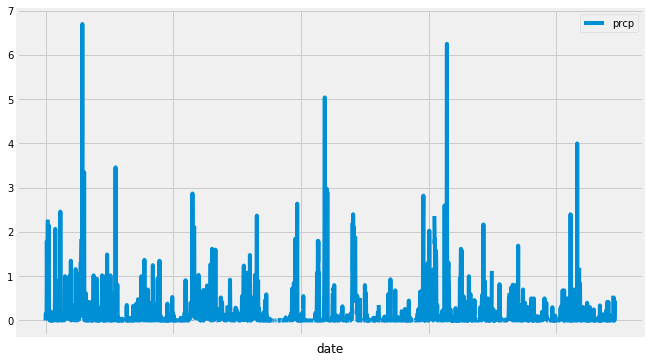

In [14]:
df.plot(figsize=(10,6))

In [15]:

# plt.rcParams['figure.figsize'] = (12,8)

# plt.plot(df.index, df['precipitation'], label="precipitation", linewidth=6)
# plt.xlabel('date')
# plt.legend()
# plt.show()


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.columns = ['precipitation']

In [17]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
session.query(Station.station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station=="USC00519281").all()



[(54.0, 85.0, 71.66378066378067)]

In [35]:
# # Choose the station with the highest number of temperature observations.
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram

result = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
filter(Measurement.station=="USC00519281").\
filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.station).all()
len(result)

352

In [36]:
df1 = pd.DataFrame(result)
df1.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


In [37]:
df1.tail()

,date,station,tobs
347,2017-08-14,USC00519281,77.0
348,2017-08-15,USC00519281,77.0
349,2017-08-16,USC00519281,76.0
350,2017-08-17,USC00519281,76.0
351,2017-08-18,USC00519281,79.0


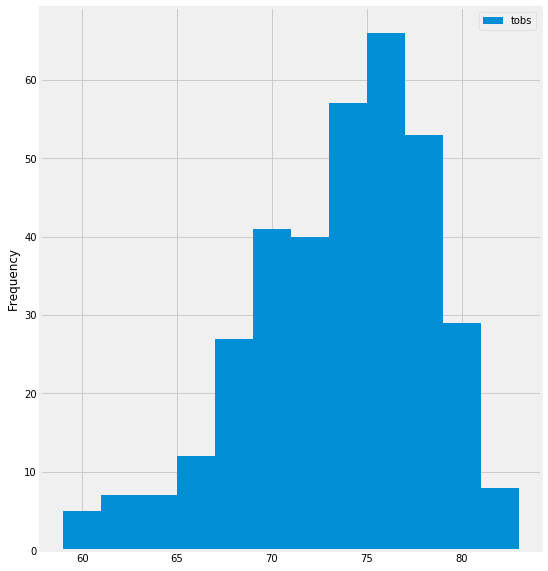

In [39]:
df1.plot(kind='hist', bins=12)

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-02-28', '2016-03-05'))

[(62.0, 69.88636363636364, 80.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temp(start_date, end_date):
    """tmin, tavg, tmax for a list of dates.
    
    Args:
        start_date(string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
    
    Returns:
        tmin, tave, and tmax
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2017-01-01', '2017-01-07'))

[(62.0, 68.36585365853658, 74.0)]


In [26]:
tave = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.date >= '2017-01-01').filter(Measurement.date <= '2017-01-07').all()
tave

[(62.0, 68.36585365853658, 74.0)]

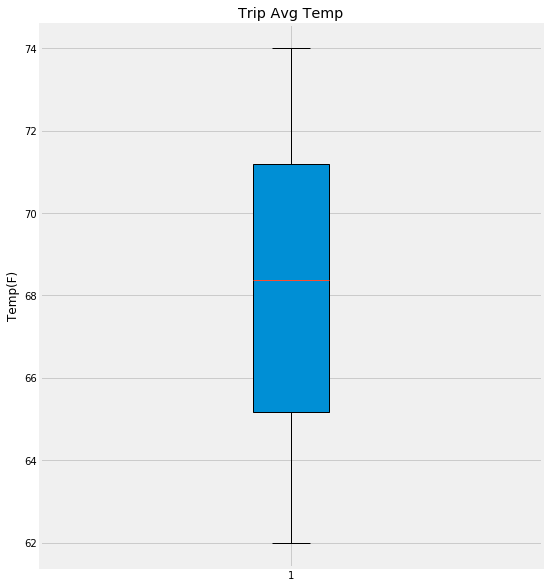

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.rcParams['figure.figsize'] = (8,10)
df2 = pd.DataFrame(tave, columns=['tmin', 'tavg', 'tmax'])
plt.boxplot(df2, patch_artist=True, vert=True)
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.show()


In [28]:
# import numpy as np

# fig, ax = plt.subplots()

# x = range(len(df2))
# ax.boxplot(df2, patch_artist=True)
# ax.set_title('Trip Avg Temp')
# fig.tight_layout()
# plt.show()

In [29]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
filter(Measurement.station == Station.station, Measurement.date >= "2017-01-01", Measurement.date <= '2017-01-07').\
group_by(Measurement.station).order_by((Measurement.prcp).desc()).all()


[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.06),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.0)]